In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [13]:
df= pd.read_csv("sales_data_with_discounts.csv")
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [15]:
df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%Y')

In [16]:
df.describe()
# in the month of april first 15 days sale

,Date,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,2021-04-08 00:00:00,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
min,2021-04-01 00:00:00,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,2021-04-04 00:00:00,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,2021-04-08 00:00:00,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,2021-04-12 00:00:00,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,2021-04-15 00:00:00,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049
std,NaN,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624


In [17]:
df.set_index('Date',inplace=True)

In [18]:
df.head(10)

,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
Date,,,,,,,,,,,,
2021-04-01,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
2021-04-01,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2021-04-01,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
2021-04-01,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
2021-04-01,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
2021-04-01,Thursday,M06,C,3,Mobiles,RealU,RU-9,8100,24300,16.996489,4130.146805,20169.853195
2021-04-01,Thursday,M07,C,3,Mobiles,Sumsang,S-20,49100,147300,9.228812,13594.039719,133705.960281
2021-04-01,Thursday,M08,C,2,Mobiles,Sumsang,S-21,54100,108200,5.553719,6009.124321,102190.875679
2021-04-01,Thursday,M09,C,2,Mobiles,Orange,O-10,55100,110200,7.410104,8165.935144,102034.064856


In [19]:
df.value_counts(['SKU','City','BU','Brand','Model'])

SKU  City  BU         Brand    Model         
F01  C     FMCG       Babaji   Babaji Oil        15
F02  C     FMCG       Vedic    Vedic Cream       15
M09  C     Mobiles    Orange   O-10              15
M08  C     Mobiles    Sumsang  S-21              15
M07  C     Mobiles    Sumsang  S-20              15
M06  C     Mobiles    RealU    RU-9              15
M05  C     Mobiles    YouM     YM-98             15
M04  C     Mobiles    YouM     YM-99 Plus        15
M03  C     Mobiles    YouM     YM-99             15
M02  C     Mobiles    RealU    RU-9 Plus         15
M01  C     Mobiles    RealU    RU-10             15
L10  C     Lifestyle  Jeera    M-Shoes           15
L09  C     Lifestyle  Jeera    M-Formals         15
L08  C     Lifestyle  Viva     W-Lounge          15
L07  C     Lifestyle  Viva     W-Western         15
L06  C     Lifestyle  Jeera    M-Casuals         15
L05  C     Lifestyle  Jeera    M-Jeans           15
L04  C     Lifestyle  Viva     W-Inners          15
L03  C     Lifesty

In [35]:
df['Discount Rate (%)'].value_counts()

Discount Rate (%)
11.654820    1
9.791440     1
6.106931     1
8.394469     1
19.940610    1
            ..
18.092168    1
17.379604    1
18.939784    1
16.121597    1
15.333300    1
Name: count, Length: 450, dtype: int64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


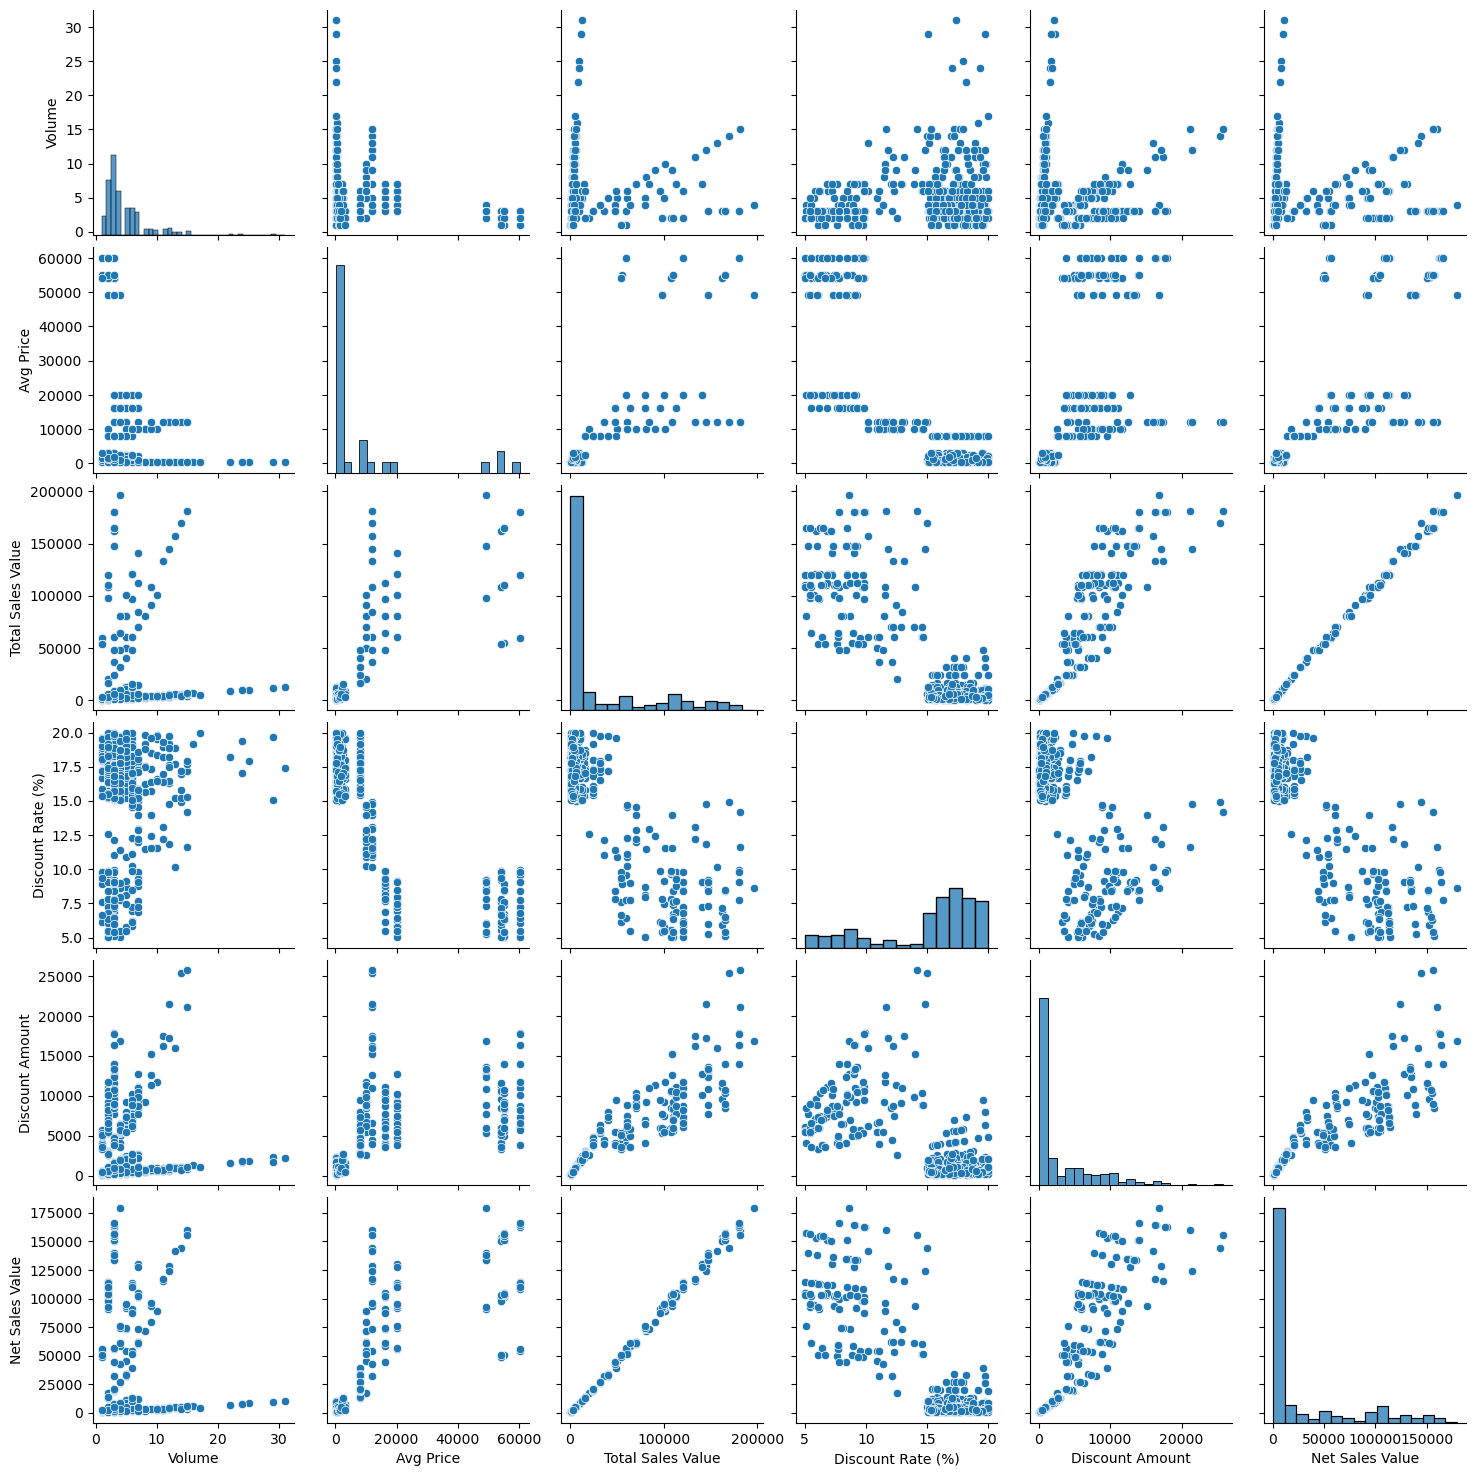

In [8]:
sn.pairplot(df)

In [20]:
# lets drop sku & city column as they doen't provide insights in this data
df.drop(['City','SKU'],axis=1,inplace=True)

# Bar Chart Analysis for Categorical Column:

In [21]:
# catagorical columns
c = [i for i in df.columns if df[i].dtypes=='O']
c

['Day', 'BU', 'Brand', 'Model']

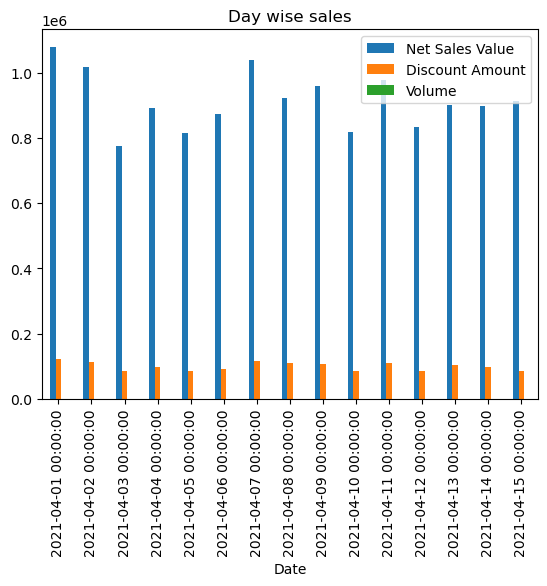

In [31]:
df.groupby('Date')[['Net Sales Value','Discount Amount','Volume']].agg('sum').plot.bar()
plt.title("Day wise sales")
plt.show()
# as compared to sales value vol is very small amount so not visible here

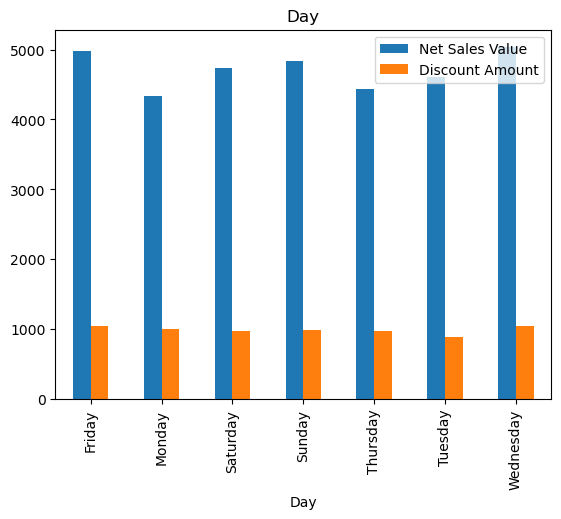

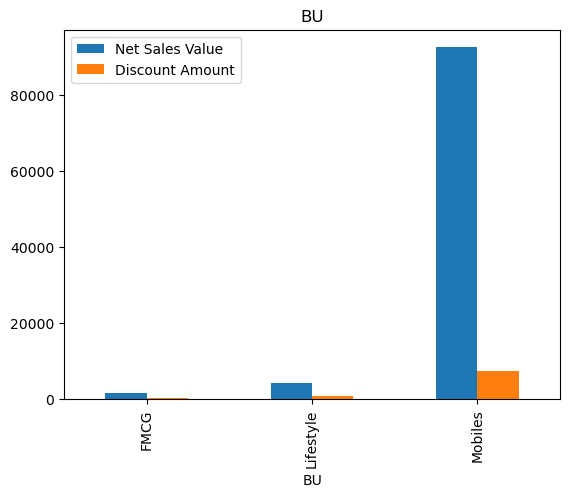

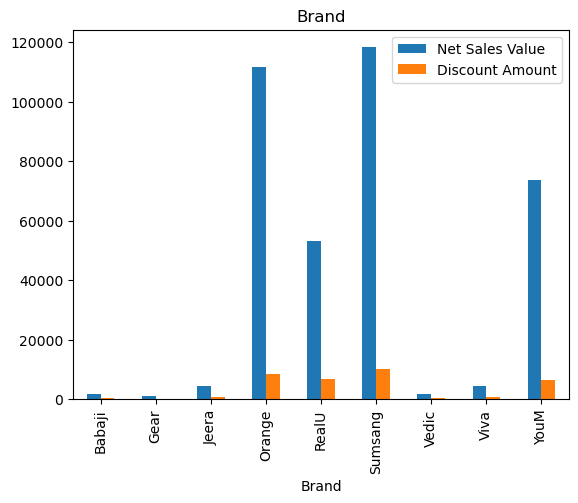

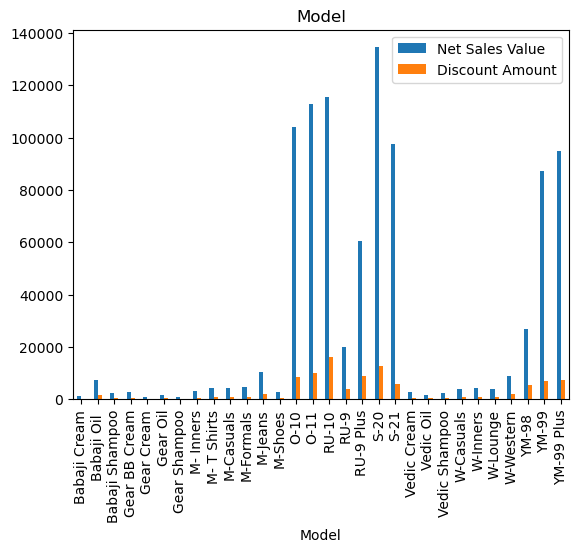

In [37]:
for feature in c:
    sale=df.copy()
    if feature=='Day':
        sale.drop('2021-04-15',axis=0,inplace=True)# droping this day to compare sales in weekdays[equal days]
    else:
        pass
    sale.groupby(feature)[['Net Sales Value','Discount Amount']].median().plot.bar()
    plt.title(feature)
    plt.show()

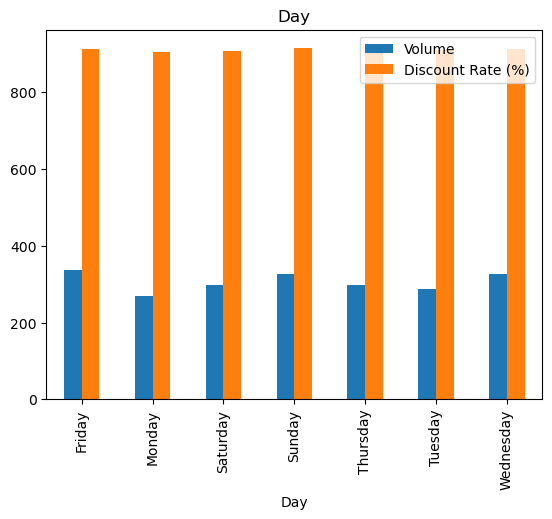

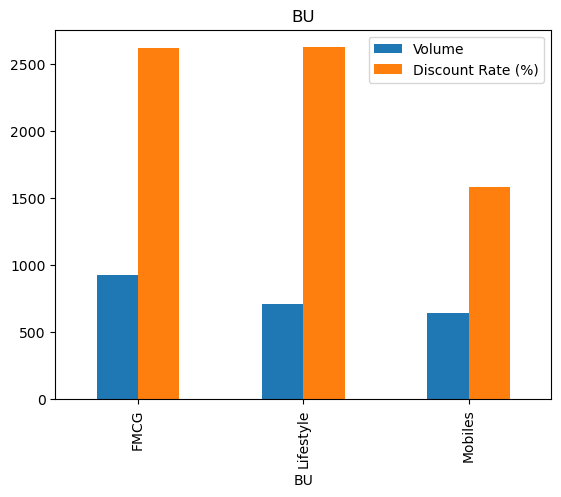

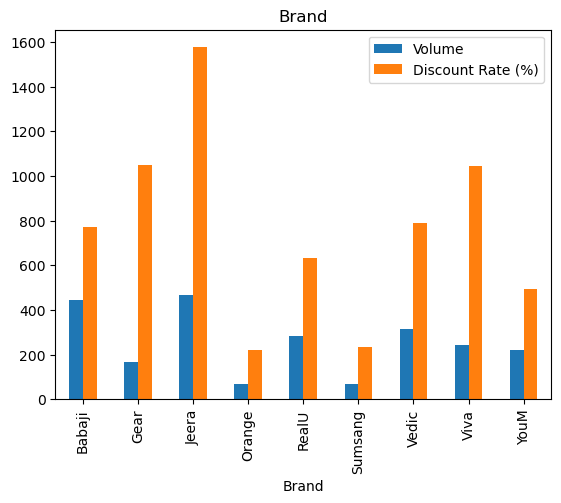

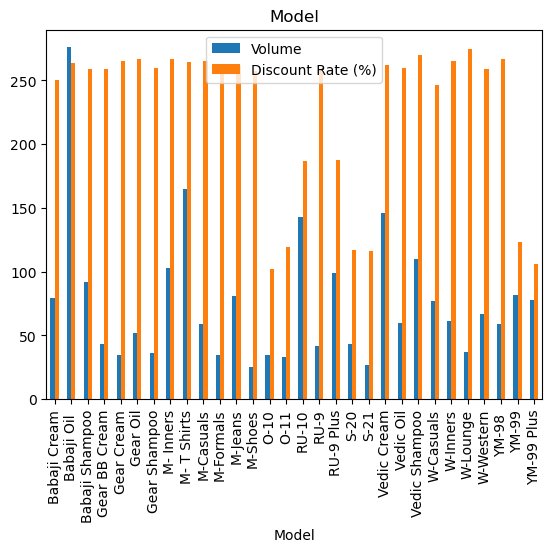

In [40]:
for feature in c:
    sale=df.copy()
    if feature=='Day':
        sale.drop('2021-04-15',axis=0,inplace=True)
    else:
        pass
    sale.groupby(feature)[['Volume','Discount Rate (%)']].sum().plot.bar()
    plt.title(feature)
    plt.show()

<Axes: xlabel='BU,Brand'>

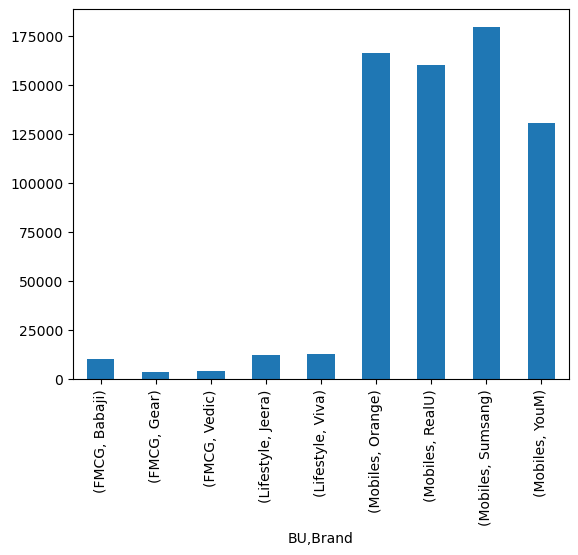

In [27]:
# max items sales in different brands
df.groupby(["BU",'Brand'])['Net Sales Value'].agg('max').plot.bar()

# Descriptive Analytics for Numerical Columns

In [22]:
# Numerical
N = [i for i in df.columns if df[i].dtypes!='O']
N

['Volume',
 'Avg Price',
 'Total Sales Value',
 'Discount Rate (%)',
 'Discount Amount',
 'Net Sales Value']

In [28]:
# Calculate the mean, median and standard deviation for Numerical columns.
df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


Volume


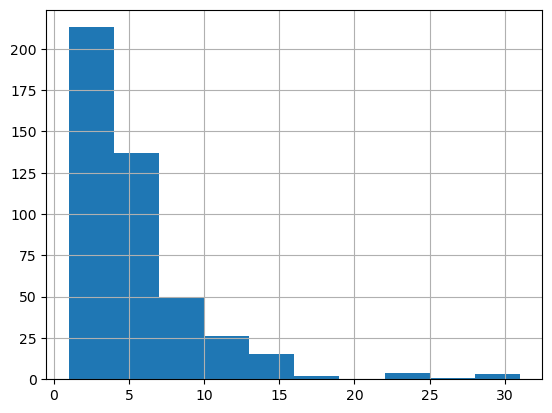

Avg Price


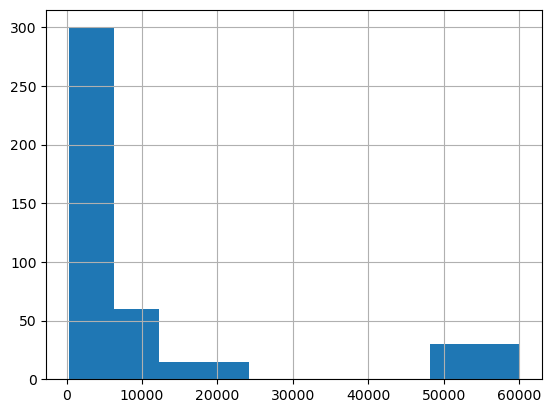

Total Sales Value


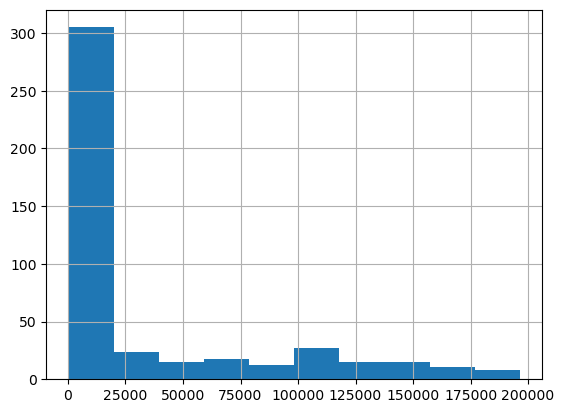

Discount Rate (%)


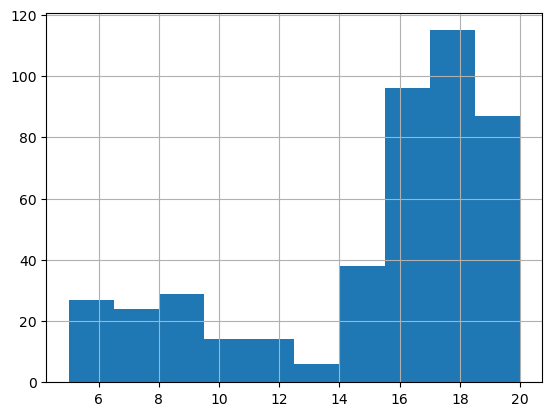

Discount Amount


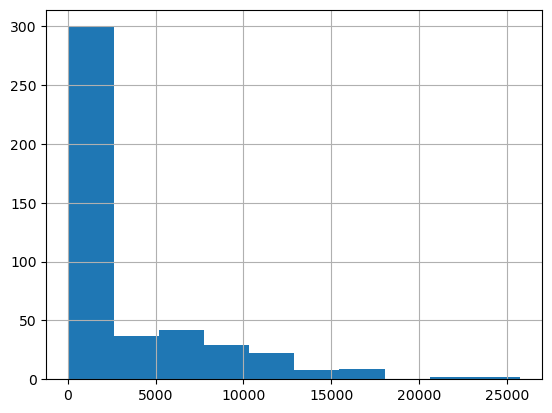

Net Sales Value


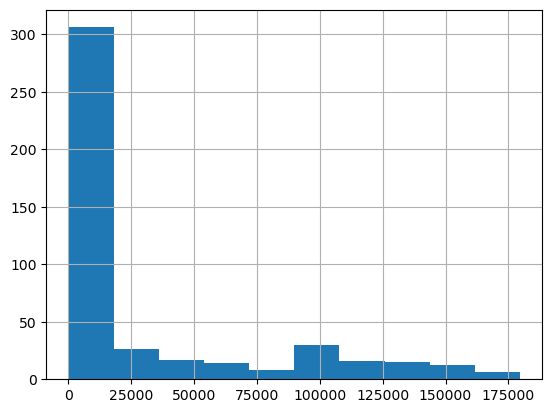

In [31]:
# Histograms: All are skewed
for i in N:
    print(i)
    df[i].hist()
    plt.show()

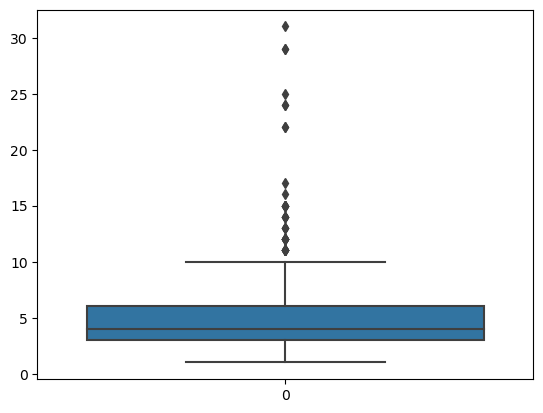

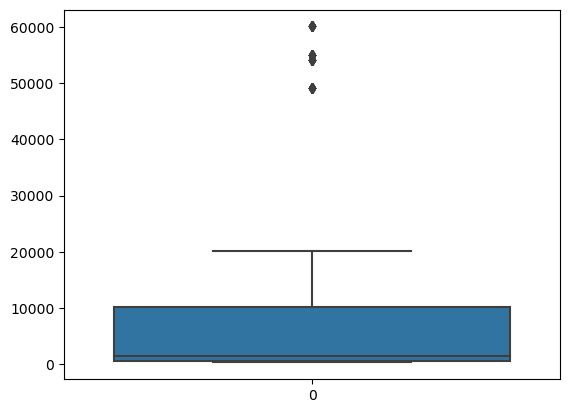

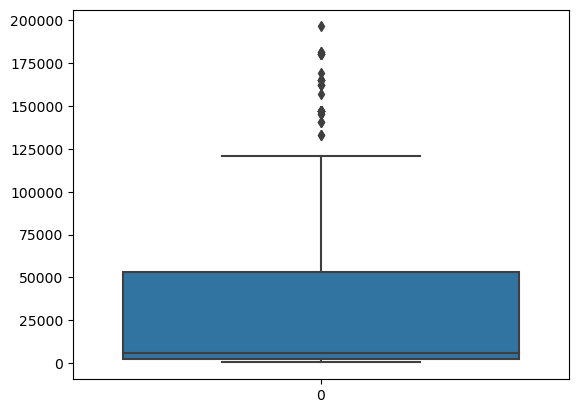

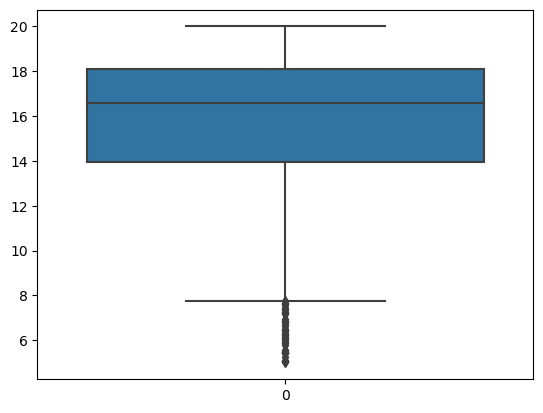

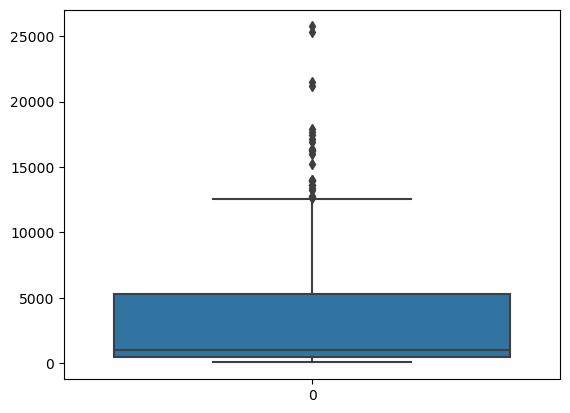

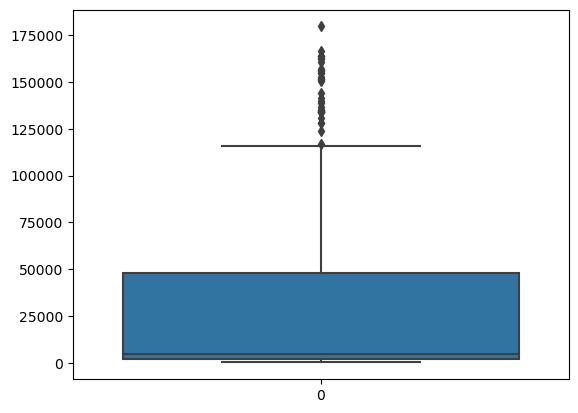

In [32]:
# Boxplots: ther are outliers
for i in N:
    sn.boxplot(df[i])
    plt.show()

# Standardization of Numerical Variables
* Standardization is a technique used to scale numerical data to have a mean of 0 and a standard deviation of 1. This is particularly important for algorithms that are sensitive to the magnitude of features, such as gradient descent. By standardizing the data, we ensure that all features contribute equally to the model's learning process, preventing features with larger magnitudes from dominating the model's predictions
*  Standardized coefficients can be compared more meaningfully across features, as they are on a similar scale
* Improved model convergence: Many optimization algorithms converge faster when the features are standardized.
* Better performance for certain algorithms: Some algorithms, like K-means clustering and support vector machines, can benefit from standardized data.
* getting all numerical variables to a common scale so can compare the variance reduces the infulence of high scale variables

In [35]:
def get_standardized(i):
    z=(i-i.mean())/(i.std())
    return z

In [33]:
se = StandardScaler()
df[N] = se.fit_transform(df[N])

In [34]:
df.head()

,Day,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
Date,,,,,,,,,,
2021-04-01,Thursday,2.350029,Mobiles,RealU,RU-10,0.091173,2.925721,-0.830289,3.952816,2.804756
2021-04-01,Thursday,1.167129,Mobiles,RealU,RU-9 Plus,-0.019570,1.330995,-0.852661,1.849014,1.271026
2021-04-01,Thursday,0.457388,Mobiles,YouM,YM-99,0.312659,1.562775,-1.351631,1.622995,1.545675
2021-04-01,Thursday,0.220808,Mobiles,YouM,YM-99 Plus,0.534146,1.719276,-1.949723,1.113807,1.765810
2021-04-01,Thursday,-0.488932,Mobiles,YouM,YM-98,-0.130313,-0.188452,0.673739,0.227852,-0.227595


# Conversion of Categorical Data into Dummy Variables
* Avoiding Ordinality: Categorical data often represents nominal variables, where the order of categories has no inherent meaning (e.g., colors, countries). Using numerical representations without converting to dummy variables can introduce an artificial ordinality, leading to incorrect model results.
* Improving Model Interpretability: Dummy variables provide a clear and interpretable representation of categorical features. Each coefficient associated with a dummy variable represents the effect of that category relative to a reference category.

In [39]:
# converting to dummy variables
df_c=pd.get_dummies(df,dtype=int)

In [40]:
df_c.head()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-01,2.350029,0.091173,2.925721,-0.830289,3.952816,2.804756,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-04-01,1.167129,-0.019570,1.330995,-0.852661,1.849014,1.271026,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-04-01,0.457388,0.312659,1.562775,-1.351631,1.622995,1.545675,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2021-04-01,0.220808,0.534146,1.719276,-1.949723,1.113807,1.765810,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2021-04-01,-0.488932,-0.130313,-0.188452,0.673739,0.227852,-0.227595,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
